#3

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from numpy import unravel_index

#4

###To keep from calling plt.show every time

In [3]:
%matplotlib inline

#5

In [4]:
###Read in gdp Data

In [5]:
gdp_df = pd.read_csv("../Data/gdp_percapita.csv", nrows=6868)

In [6]:
#print((gdp_df[0:7]))

#6

In [7]:
internet_df = pd.read_csv("../data/internet_use.csv", nrows=4495)

In [8]:
print((internet_df[0:7]))

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
5     Afghanistan  2009  3.550000              NaN
6     Afghanistan  2008  1.840000              NaN


#98

In [9]:
gdp_df.shape

(6868, 4)

In [10]:
#internet_df.shape

#6 - Repeat

In [11]:
#gdp_df.dtypes

In [12]:
#internet_df.dtypes

#99

In [13]:
#gdp_df.tail(10)

In [14]:
#internet_df.tail(10)

#7 and 8

In [15]:
gdpnew_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})

In [16]:
#inplace=True allows for reasigning ... otherwise drop('ldfkj',1)

In [17]:
gdpnew_df.drop('Value Footnotes', axis=1, inplace=True)

In [18]:
print(gdpnew_df[0:7])

       Country  Year  GDP_Per_Capita
0  Afghanistan  2019     2065.036398
1  Afghanistan  2018     2033.779002
2  Afghanistan  2017     2058.383832
3  Afghanistan  2016     2057.062164
4  Afghanistan  2015     2068.265904
5  Afghanistan  2014     2102.385234
6  Afghanistan  2013     2116.465454


#7 and 9

In [19]:
internetnew_df = internet_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'Internet_Users_Pct'})

In [20]:
internetnew_df.drop('Value Footnotes', axis=1, inplace=True)

In [21]:
print(internetnew_df[0:7])

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000
5  Afghanistan  2009            3.550000
6  Afghanistan  2008            1.840000


#10

In [22]:
gdp_and_internet_use = pd.merge(gdpnew_df, internetnew_df, on=['Country', 'Year'], how='outer')

In [23]:
gdp_and_internet_use.dtypes

Country                object
Year                    int64
GDP_Per_Capita        float64
Internet_Users_Pct    float64
dtype: object

In [24]:
gdp_and_internet_use.shape

(7905, 4)

#11

In [25]:
print((gdp_and_internet_use[0:5]))

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2019     2065.036398                 NaN
1  Afghanistan  2018     2033.779002                 NaN
2  Afghanistan  2017     2058.383832                 NaN
3  Afghanistan  2016     2057.062164                 NaN
4  Afghanistan  2015     2068.265904                 NaN


#12

In [26]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7900,Yemen,1999,NaN,0.056629
7901,Yemen,1998,NaN,0.023323
7902,Yemen,1997,NaN,0.015025
7903,Yemen,1996,NaN,0.000621
7904,Yemen,1990,NaN,0.000000


In [27]:
#sorting data

In [28]:
gdp_and_internet_use.sort_values(by = ['Country', 'Year'], axis=0, ascending=[True, True], inplace=True,
               kind='quicksort', na_position='first', ignore_index=True, key=None)

In [29]:
print((gdp_and_internet_use[0:5]))

       Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  1990             NaN            0.000000
1  Afghanistan  2001             NaN            0.004723
2  Afghanistan  2002     1189.784878            0.004561
3  Afghanistan  2003     1235.810063            0.087891
4  Afghanistan  2004     1200.278256            0.105809


In [30]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7900,Zimbabwe,2015,2958.209004,NaN
7901,Zimbabwe,2016,2934.733650,NaN
7902,Zimbabwe,2017,3028.245976,NaN
7903,Zimbabwe,2018,3130.029501,NaN
7904,Zimbabwe,2019,2835.948532,NaN


#13

In [31]:
year_subset = gdp_and_internet_use[(gdp_and_internet_use["Year"]==2004) | (gdp_and_internet_use["Year"]==2009) | (gdp_and_internet_use["Year"]==2014)]

In [32]:
year_subset.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2004,1200.278256,0.105809
9,Afghanistan,2009,1758.904043,3.550000
14,Afghanistan,2014,2102.385234,6.390000
34,Albania,2004,7604.838002,2.420388
39,Albania,2009,10346.864199,41.200000


#14

In [33]:
gdp_web_2004 = year_subset[(year_subset["Year"]==2004)]

In [34]:
gdp_web_2004.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2004,1200.278256,0.105809
34,Albania,2004,7604.838002,2.420388
64,Algeria,2004,10058.435939,4.634475
89,Andorra,2004,NaN,26.837954
114,Angola,2004,5593.241537,0.464815


In [35]:
gdp_web_2009 = year_subset[(year_subset["Year"]==2009)]

In [36]:
gdp_web_2009.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
9,Afghanistan,2009,1758.904043,3.55
39,Albania,2009,10346.864199,41.20
69,Algeria,2009,10782.361398,11.23
94,Andorra,2009,NaN,78.53
119,Angola,2009,7643.493749,6.00


In [37]:
gdp_web_2014 = year_subset[(year_subset["Year"]==2014)]

In [38]:
gdp_web_2014.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
14,Afghanistan,2014,2102.385234,6.39
44,Albania,2014,11623.866679,60.10
74,Algeria,2014,11512.705405,18.09
99,Andorra,2014,NaN,95.90
124,Angola,2014,8239.828837,21.26


#15 Which country had the highest percentage of internet users in 2014? What was the percentage?

In [39]:
#Array not needed as Pandas is a tablature version of Python array ... using Dataframe

In [40]:
#gdp_web_2014a = np.array(gdp_web_2014)

In [41]:
#max_pct = np.nanmax(gdp_web_2014a[:,3])

In [42]:
print(gdp_web_2014['Internet_Users_Pct'].max())

98.16


In [44]:
#Finding Index of max value

In [ ]:
# np.argmax(gdp_web_2014a[:,3]) for an array

In [60]:
print(gdp_web_2014.iloc[:, 3].dropna().idxmax())

3249


In [64]:
gdp_web_2014.loc[3249]

Country                  Iceland
Year                        2014
GDP_Per_Capita        49652.1495
Internet_Users_Pct         98.16
Name: 3249, dtype: object

In [ ]:
# gdp_web_2014a[3249:3250,:] for an array

#####    iloc[ ] is used to select rows/ columns by their corresponding labels.
#####    loc[ ] is used to select rows/columns by their indices.
#####   [ ] is used to select columns by their respective names.

#16 Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [65]:
print(gdp_web_2014['Internet_Users_Pct'].min())

0.0


In [67]:
print(gdp_web_2014.iloc[:, 3].dropna().idxmin())

1645


In [71]:
gdp_web_2014.loc[gdp_web_2014.iloc[:, 3].dropna().idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2014
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 1645, dtype: object

In [ ]:
#What if there is more than one country with 0.0?

#17 Repeat for 2004 and 2009

In [93]:
print(gdp_web_2004.iloc[:, 3].dropna().min())

0.0


In [92]:
print(gdp_web_2004.iloc[:, 3].dropna().max())

83.89


##### index inside of loc command

In [100]:
#gdp_web_2004.loc[gdp_web_2004.iloc[:, 3].dropna().idxmin()]

In [99]:
#gdp_web_2004.loc[gdp_web_2004.iloc[:, 3].dropna().idxmax()]

In [98]:
print(gdp_web_2004.loc[gdp_web_2004.iloc[:, 3].dropna().idxmin()],"\n"),
print(gdp_web_2004.loc[gdp_web_2004.iloc[:, 3].dropna().idxmax()])

Country               Dem. People's Rep. of Korea
Year                                         2004
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 1636, dtype: object 

Country                     Sweden
Year                          2004
GDP_Per_Capita        44496.023401
Internet_Users_Pct           83.89
Name: 6849, dtype: object


In [101]:
print(gdp_web_2009.loc[gdp_web_2009.iloc[:, 3].dropna().idxmin()],"\n"),
print(gdp_web_2009.loc[gdp_web_2009.iloc[:, 3].dropna().idxmax()])

Country               Dem. People's Rep. of Korea
Year                                         2009
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 1641, dtype: object 

Country                    Iceland
Year                          2009
GDP_Per_Capita        48177.084123
Internet_Users_Pct            93.0
Name: 3244, dtype: object


In [102]:
print(gdp_web_2014.loc[gdp_web_2014.iloc[:, 3].dropna().idxmin()],"\n"),
print(gdp_web_2014.loc[gdp_web_2014.iloc[:, 3].dropna().idxmax()])

Country               Dem. People's Rep. of Korea
Year                                         2014
GDP_Per_Capita                                NaN
Internet_Users_Pct                            0.0
Name: 1645, dtype: object 

Country                  Iceland
Year                        2014
GDP_Per_Capita        49652.1495
Internet_Users_Pct         98.16
Name: 3249, dtype: object


#18 & 19? Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [103]:
print(gdp_web_2014.loc[gdp_web_2014.iloc[:, 2].dropna().idxmax()])

Country               Macao SAR, China
Year                              2014
GDP_Per_Capita            156514.13385
Internet_Users_Pct                 NaN
Name: 4349, dtype: object


#20 Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [106]:
print(gdp_web_2014.loc[gdp_web_2014.iloc[:, 2].dropna().idxmin()])

Country               Central African Republic
Year                                      2014
GDP_Per_Capita                      822.610458
Internet_Users_Pct                         NaN
Name: 1182, dtype: object


#21.	Create some scatterplots:  
    a.  2004 Percent Using the Internet vs GDP Per Capita  
    b.	2009 Percent Using the Internet vs GDP Per Capita  
    c.	2014 Percent Using the Internet vs GDP Per Capita  

In [107]:
gdp_web_2004.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
4,Afghanistan,2004,1200.278256,0.105809
34,Albania,2004,7604.838002,2.420388
64,Algeria,2004,10058.435939,4.634475
89,Andorra,2004,NaN,26.837954
114,Angola,2004,5593.241537,0.464815


<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Internet_Users_Pct'>

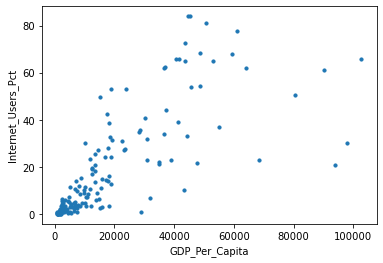

In [108]:
gdp_web_2004.plot.scatter(x = 'GDP_Per_Capita', y = 'Internet_Users_Pct', s = 10)